# **Forecasting Exam Scores Based on Study Hours**

## Business Problem

The business problem here is to determine the relationship between study hours and exam performance, enabling students to make informed decisions about their study habits to achieve specific academic goals. This involves identifying the required study hours for reaching high scores, the minimum study hours needed to pass, and the expected marks based on a given number of study hours per day. By understanding these insights, students can allocate their study time more effectively to maximize their academic success.

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load and Explore the Dataset

In [2]:
df = pd.read_csv('student_info.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


### Visualize the Data to gain insights

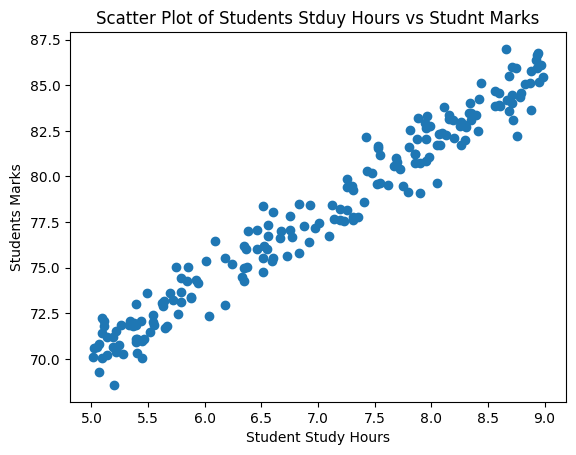

In [8]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('Student Study Hours')
plt.ylabel('Students Marks')
plt.title('Scatter Plot of Students Stduy Hours vs Studnt Marks')
plt.show()

### Prepare the data for Machine Learning Algorithms

#### Data Cleaning

In [9]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [10]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [11]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [12]:
df2 = df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


#### Split Dataset

In [15]:
x = df2.drop('student_marks', axis = 1)
y = df2.drop('study_hours', axis = 1)

In [16]:
print('Shape of x = ', x.shape)
print('Shape of y = ', y.shape)

Shape of x =  (200, 1)
Shape of y =  (200, 1)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (160, 1)
Shape of y_train =  (160, 1)
Shape of x_test =  (40, 1)
Shape of y_test =  (40, 1)


### Select a model and train it

In [18]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
print(lr.coef_)

[[3.8947438]]


In [21]:
print(lr.intercept_)

[50.69910596]


In [22]:
m = 3.93
c = 50.44
y = m * 4 + c
y

66.16

In [23]:
lr.predict([[4]])[0][0].round(2)

66.28

In [24]:
y_pred = lr.predict(x_test)
y_pred

array([[71.2633532 ],
       [84.1939026 ],
       [84.89495648],
       [82.63600508],
       [81.46758194],
       [80.64968575],
       [83.02547946],
       [79.59810492],
       [84.03811285],
       [76.98862658],
       [77.94653382],
       [70.52335188],
       [75.4696765 ],
       [77.84547022],
       [78.70231385],
       [83.22021665],
       [75.43072906],
       [75.85915088],
       [82.16863583],
       [74.76862262],
       [85.08969367],
       [72.0812494 ],
       [75.43072906],
       [70.71808907],
       [73.24967254],
       [85.44022062],
       [72.70440841],
       [80.10442162],
       [77.30020608],
       [71.69177502],
       [76.24862526],
       [78.97494592],
       [84.66127186],
       [82.36337302],
       [76.05388807],
       [84.62232442],
       [70.91282626],
       [84.77811417],
       [85.28443086],
       [73.75598923]])

In [25]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.280000,70.27,71.263353
1,8.600000,84.58,84.193903
2,8.780000,84.35,84.894956
3,8.200000,82.10,82.636005
4,7.900000,80.76,81.467582
5,7.690000,81.01,80.649686
6,8.300000,82.02,83.025479
7,7.420000,82.18,79.598105
8,8.560000,84.68,84.038113
9,6.750000,77.07,76.988627


### Evaluating the Model

In [26]:
# Finding accuracy score for a classification model
acc = lr.score(x_test, y_test)  # Ensure correct test dataset is used
print("Accuracy = " + str(acc * 100) + " %")

# Finding mean squared error (MSE) for a regression model
from sklearn.metrics import mean_squared_error
err = mean_squared_error(y_test, y_pred)  # Ensure y_pred is the predicted output from the model
print("Mean Squared Error = " + str(err))

# Finding mean absolute error (MAE) for a regression model
from sklearn.metrics import mean_absolute_error
abs_err = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = " + str(abs_err))

Accuracy = 96.69667647299043 %
Mean Squared Error = 0.8018046535772168
Mean Absolute Error = 0.7238210066368875


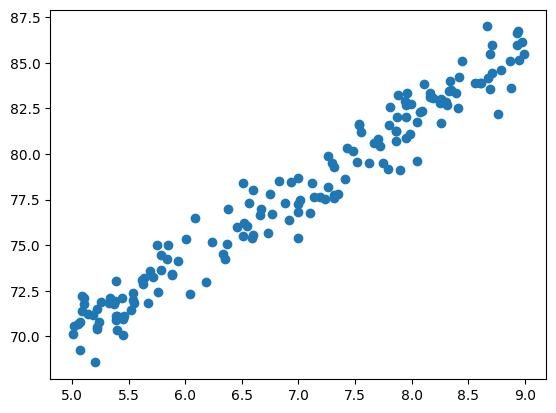

In [27]:
plt.scatter(x_train,y_train)

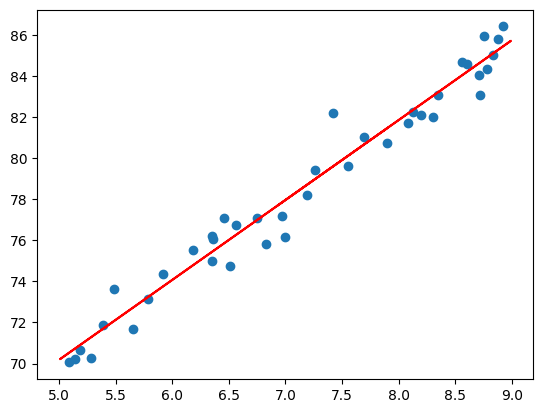

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

### Present your solution

#### Save ML Model

In [29]:
import joblib  
joblib.dump(lr, "Forecasting_Exam_Scores_Based_on_Study_Hours.pkl")

['Forecasting_Exam_Scores_Based_on_Study_Hours.pkl']

In [30]:
model = joblib.load("Forecasting_Exam_Scores_Based_on_Study_Hours.pkl")

In [31]:
model.predict([[5]])[0][0]

70.17282493922167

### Launch, monitor and maintain your system